In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
digits = load_digits()#встроенный датасет
X = digits.data
y = digits.target

scaler = StandardScaler() # функция для нормирования признаков
X = scaler.fit_transform(X)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


In [5]:
создаем класс модели, наследуемый от nn.Module

SyntaxError: invalid syntax (2801180890.py, line 1)

In [30]:
class Net(nn.Module):
    def __init__(self): # инициализация модели
        super(Net, self).__init__()
        self.fc1 = nn.Linear(64, 100) #64 - число входных нейронов, 100 - количество нейронов на первом скрытом слое
        self.relu = nn.LeakyReLU()
        self.fc2 = nn.Linear(100, 10) #на входе 100 нейронов, на выходе 10 - по количеству классов

    def forward(self, X):
        X = self.relu(self.fc1(X))
        X = self.fc2(X)
        return X

model = Net()# Оббявили модель класса Net
model2 = Net()

In [31]:
criterion = nn.CrossEntropyLoss()
cr2 = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)
opt2 = optim.Adam(model2.parameters(), lr=0.001)


In [32]:
for epoch in range(50):
    optimizer.zero_grad()
    output = model2(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    opt2.step()
    if epoch % 10 ==0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 2.2628
Epoch 10 Loss: 1.8945
Epoch 20 Loss: 1.5208
Epoch 30 Loss: 1.1500
Epoch 40 Loss: 0.8256


In [23]:
model.eval() #перевод модели в режим оценки
with torch.no_grad(): #отключаем подсчет градиентов для оптимизации памяти
    predictions  = model2(X_test) # получаем тенсор из предсказаний вероятности класса
    predicted_labels = torch.argmax(predictions, axis=1)#получаем класс с максимальной вероятностью
    acc = accuracy_score(y_test, predicted_labels)
    print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9722


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [25]:
y = y_test.cpu().numpy()
y_pred = predicted_labels.cpu().numpy()

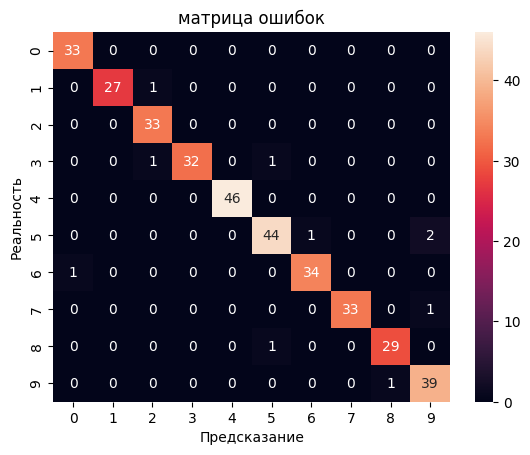

In [26]:
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Предсказание")
plt.ylabel("Реальность")
plt.title("матрица ошибок")
plt.show()